<a href="https://colab.research.google.com/github/Muhammadyusuf2580/MachinLarning/blob/main/Decesion_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import kagglehub
import os



In [3]:
# 1. Datasetni yuklab olish
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")
file_path = os.path.join(path, "student_depression_dataset.csv")



In [29]:
# 2. CSVni o'qish
df = pd.read_csv(file_path)



In [30]:
# 3. Foydalaniladigan ustunlar
feature_cols = [
    'Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
    'Study Satisfaction','Job Satisfaction', 'Sleep Duration',
    'Dietary Habits', 'Work/Study Hours', 'Financial Stress',
    'Family History of Mental Illness'
]



In [31]:
# 4. NaN qiymatlarni olib tashlash
df = df[feature_cols + ['Depression']].dropna()



In [32]:
# 5. Kategoriyali ustunlarni raqamlashtirish
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])



In [33]:
# 6. X va y ni ajratish
X = df[feature_cols]
y = df['Depression']



In [34]:
# 7. Train / Test bo'lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [35]:
# 8. Decision Tree modelini o‘rgatish
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, random_state=42)

In [36]:
# 9. Bashorat va baholash
y_pred = dt_model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))



✅ Accuracy: 0.7729797527324852
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.66      0.71      2343
           1       0.78      0.86      0.81      3238

    accuracy                           0.77      5581
   macro avg       0.77      0.76      0.76      5581
weighted avg       0.77      0.77      0.77      5581



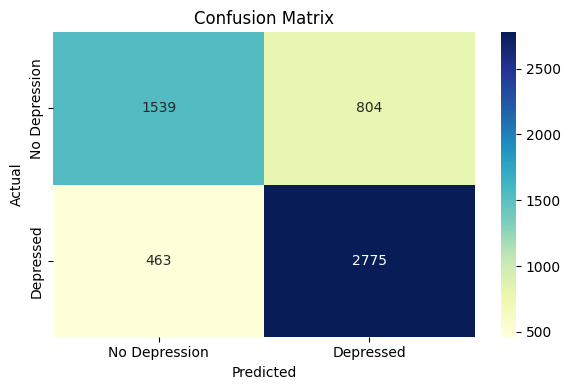

In [37]:
# 10. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=["No Depression", "Depressed"], yticklabels=["No Depression", "Depressed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()



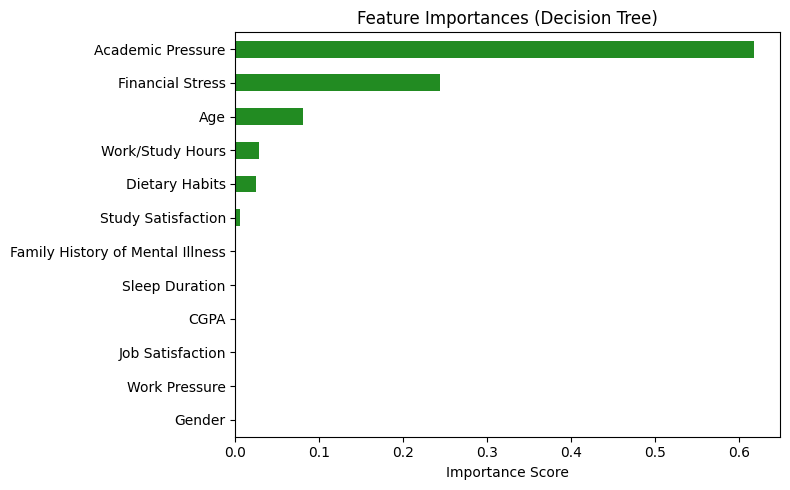

In [38]:
# 11. Feature Importances
importances = dt_model.feature_importances_
feat_importances = pd.Series(importances, index=feature_cols).sort_values(ascending=True)

plt.figure(figsize=(8, 5))
feat_importances.plot(kind='barh', color='forestgreen')
plt.title("Feature Importances (Decision Tree)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()



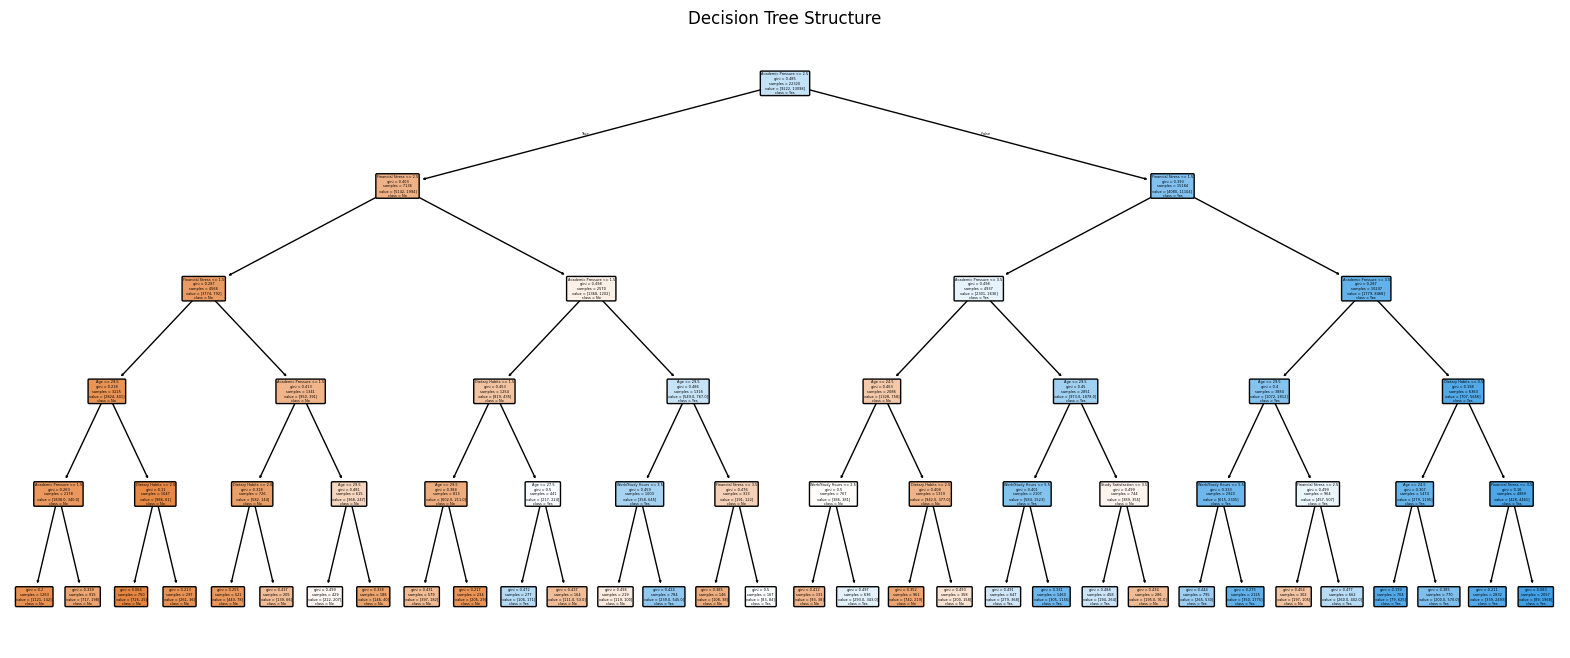

In [39]:
# 12. Daraxt strukturasi (vizual)
plt.figure(figsize=(20, 8))
plot_tree(dt_model, feature_names=feature_cols, class_names=["No", "Yes"], filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()
